In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

- figure size
- Title
- x-axis, y-axis: labels, tick labels
- colors
- annotate
- chart Vs plot

## Read data

In [2]:
df = pd.read_excel("data/Teams.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


In [3]:
df.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [4]:
df['Event'].unique()

array(['Men', 'Women', "Men's Team", 'Mixed Team', "Women's Team", 'Duet',
       'Team', "Women's 4 x 400m Relay", '4 x 400m Relay Mixed',
       "Men's 4 x 400m Relay", "Men's 4 x 100m Relay",
       "Women's 4 x 100m Relay", 'Softball', 'Baseball', "Men's Madison",
       "Men's Team Pursuit", "Men's Team Sprint", "Women's Madison",
       "Women's Team Pursuit", "Women's Team Sprint", "Men's Foil Team",
       "Women's Foil Team", "Men's Épée Team", "Women's Épée Team",
       "Women's Sabre Team", "Men's Sabre Team", 'Group All-Around',
       "Men's 4 x 100m Freestyle Relay", "Men's 4 x 100m Medley Relay",
       "Men's 4 x 200m Freestyle Relay", 'Mixed 4 x 100m Medley Relay',
       "Women's 4 x 100m Freestyle Relay",
       "Women's 4 x 100m Medley Relay",
       "Women's 4 x 200m Freestyle Relay", 'Mixed Doubles', 'Mixed Relay'],
      dtype=object)

In [5]:
def getGender(x):
    if 'Men' in x:
        return 'Men'
    elif 'Women' in x:
        return 'Women'
    else:
        return 'Mixed'

df['Event'] = df['Event'].apply(lambda x: getGender(x))
df['Event'].unique()

array(['Men', 'Women', 'Mixed'], dtype=object)

In [6]:
df.rename(columns={'NOC':'Country'}, inplace=True)

In [7]:
df.head()

,Name,Discipline,Country,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


## Bar plots - single & grouped 

### Prepare data

In [8]:
df_ = df[['Discipline', 'Event']].groupby(by=['Discipline']).agg({'Discipline':'count', 'Event':'nunique'}).rename(columns={'Discipline':'Participants'})
df_.head()

,Participants,Event
Discipline,,
3x3 Basketball,16,2
Archery,53,3
Artistic Gymnastics,24,2
Artistic Swimming,32,1
Athletics,79,3


### pandas dataframe

| plot | df | |
|---|---|---|
| df | df[column] | single bar|
| df | df[columns] | grouped bar|
| x | index | |
| y | column(s) | |
| | | |

<AxesSubplot:title={'center':'Disciplines - Participants & Events'}, xlabel='Discipline'>

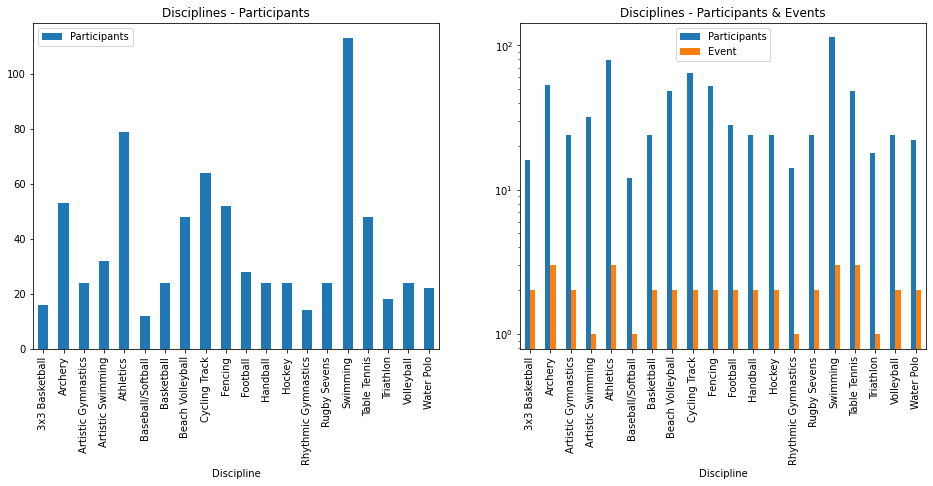

In [9]:
plt.figure(figsize=(16,6))
ax = plt.subplot(1, 2, 1); df_.plot.bar(y='Participants', ax=ax, title= "Disciplines - Participants")         # Single column
ax = plt.subplot(1, 2, 2); df_.plot.bar(y=['Participants', 'Event'], logy=True, ax=ax, title = "Disciplines - Participants & Events")    # Multiple columns

In [10]:
df_.reset_index(inplace=True); df_.head()

,Discipline,Participants,Event
0,3x3 Basketball,16,2
1,Archery,53,3
2,Artistic Gymnastics,24,2
3,Artistic Swimming,32,1
4,Athletics,79,3


| plot | df | |
|---|---|---|
| x | x = column | |
| y | column(s) | |
| | | |

<AxesSubplot:title={'center':'Disciplines - Participants & Events'}, xlabel='Discipline'>

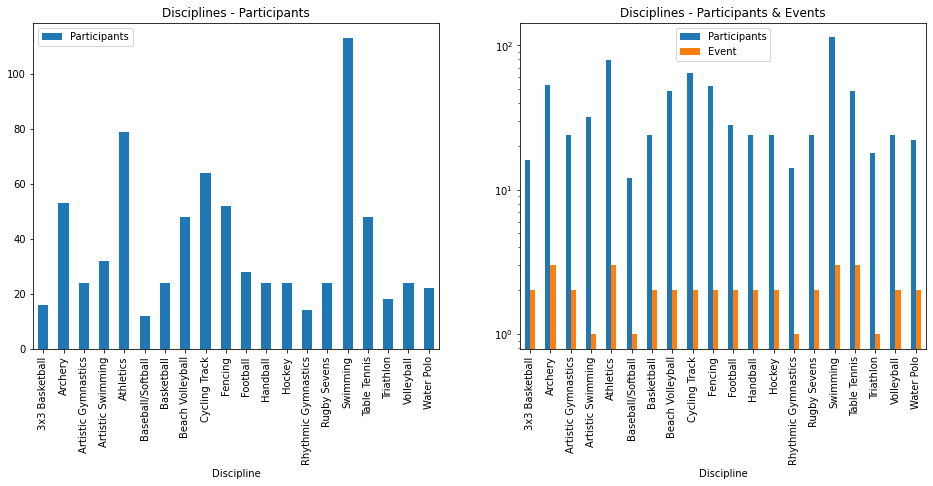

In [11]:
plt.figure(figsize=(16,6))
ax = plt.subplot(1, 2, 1); df_.plot.bar(x='Discipline', y='Participants', ax=ax, title= "Disciplines - Participants")         # Single column
ax = plt.subplot(1, 2, 2); df_.plot.bar(x='Discipline', y=['Participants', 'Event'], logy=True, ax=ax, title = "Disciplines - Participants & Events")    # Multiple columns

### matplotlib

[Grouped bar plot](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html)

<BarContainer object of 20 artists>

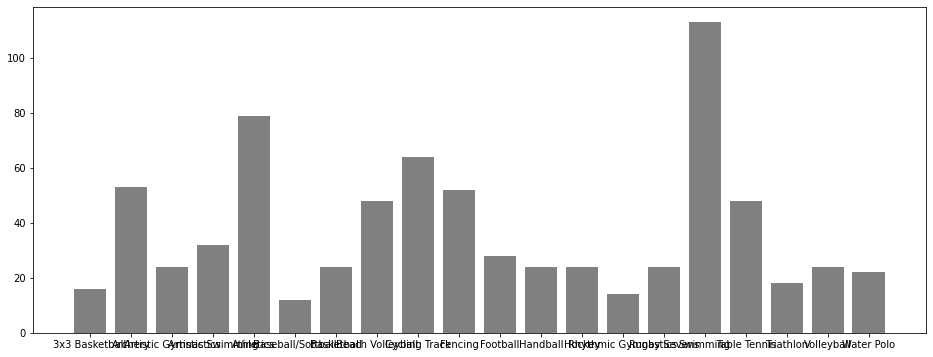

In [12]:
plt.figure(figsize=(16,6))
plt.bar(x = df_['Discipline'], height = df_['Participants'], color='grey')

### seaborn

In [13]:
df_ = df.groupby(by=['Discipline', 'Event']).agg({'Discipline':'count'}).rename(columns={'Discipline':'Participants'}).reset_index()
df_.head()

,Discipline,Event,Participants
0,3x3 Basketball,Men,8
1,3x3 Basketball,Women,8
2,Archery,Men,12
3,Archery,Mixed,29
4,Archery,Women,12


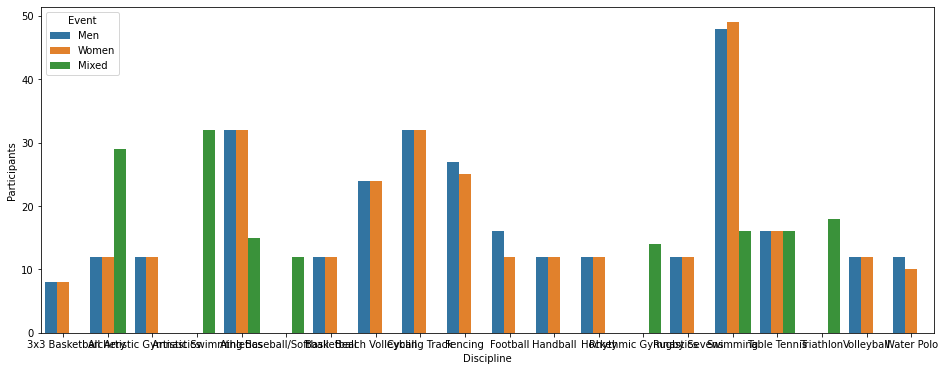

In [14]:
plt.figure(figsize=(16,6))
ax = sns.barplot(data=df_, x="Discipline", y='Participants', hue='Event')

### plotly

In [15]:
fig = px.bar(df_, x='Discipline', y='Participants'); fig.show()

In [16]:
fig = px.bar(df_, x="Discipline", y='Participants', color='Event')
fig.show()

## Stacked Bar plot - Regular & 100%

### Prepare data

In [17]:
df_ = df.groupby(by=['Discipline', 'Event']).agg({'Discipline':'count'}).rename(columns={'Discipline':'Participants'}).reset_index()
df_.set_index('Discipline', inplace=True)
df_ = df_.pivot_table(index='Discipline', columns='Event', values='Participants').fillna(0).astype(int)
COLS = ['Men','Women','Mixed']
COLS_PC = [f"{col}%" for col in COLS]
df_ = df_[COLS]
df_['Total'] = df_.sum(axis=1)
for col in COLS:
    df_[f'{col}%'] = (100 * df_[col]/df_['Total']).round(1)
df_.head()

Event,Men,Women,Mixed,Total,Men%,Women%,Mixed%
Discipline,,,,,,,
3x3 Basketball,8,8,0,16,50.0,50.0,0.0
Archery,12,12,29,53,22.6,22.6,54.7
Artistic Gymnastics,12,12,0,24,50.0,50.0,0.0
Artistic Swimming,0,0,32,32,0.0,0.0,100.0
Athletics,32,32,15,79,40.5,40.5,19.0


### pandas

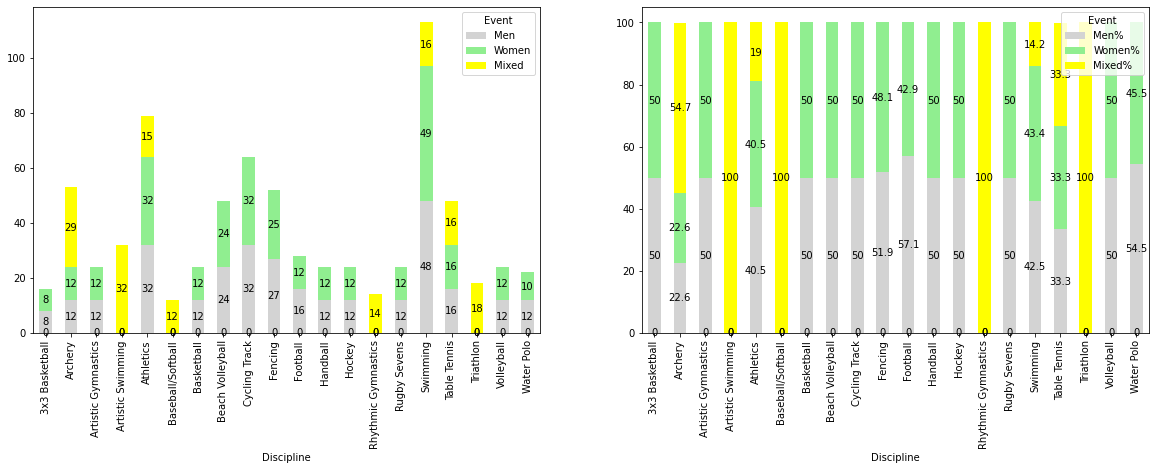

In [18]:
from matplotlib import cm

plt.figure(figsize=(20,6))

# use normal columns
ax = plt.subplot(1, 2, 1); 
ax = df_[COLS].plot(kind='bar', stacked=True, color = {'Men':'lightgrey','Women':'lightgreen','Mixed':'yellow', }, ax=ax)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# use percentage columns
ax = plt.subplot(1, 2, 2); 
ax = df_[COLS_PC].plot(kind='bar', stacked=True, color = {'Men%':'lightgrey','Women%':'lightgreen','Mixed%':'yellow', }, ax=ax)

for c in ax.containers:
    ax.bar_label(c, label_type='center')

| plot | df | |
|---|---|---|
| df | pivot | |
| x | index| |
| y | columns & values | |
| | | |

### Without index

In [19]:
df_.reset_index(inplace=True)
df_.head()

Event,Discipline,Men,Women,Mixed,Total,Men%,Women%,Mixed%
0,3x3 Basketball,8,8,0,16,50.0,50.0,0.0
1,Archery,12,12,29,53,22.6,22.6,54.7
2,Artistic Gymnastics,12,12,0,24,50.0,50.0,0.0
3,Artistic Swimming,0,0,32,32,0.0,0.0,100.0
4,Athletics,32,32,15,79,40.5,40.5,19.0


### plotly

In [20]:
fig = px.bar(df_, x="Discipline", y=COLS, title="Discipline - Participants & Events"); fig.show()

In [21]:
fig = px.bar(df_, x="Discipline", y=COLS_PC, title="Discipline - Participants & Events"); fig.show()

### matplotlib

| plot | df | |
|---|---|---|
| df | pivot | |
| x | index| |
| height | columns & values | |
| | | |

<BarContainer object of 20 artists>

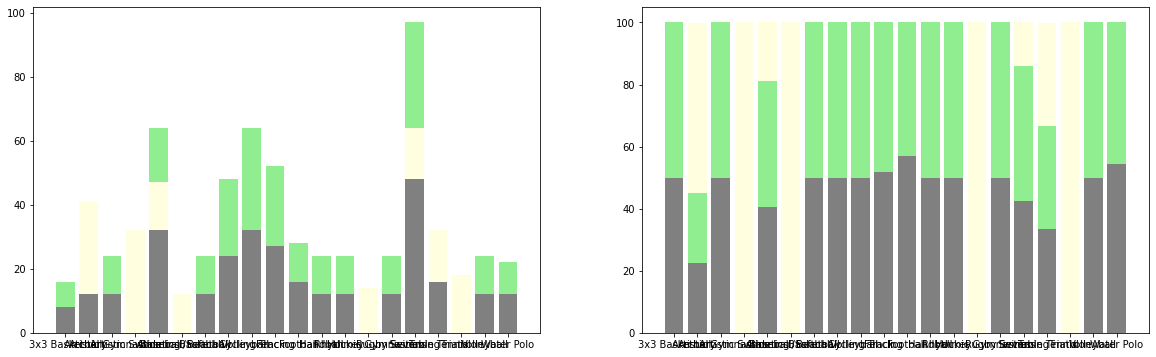

In [22]:
plt.figure(figsize=(20,6))

ax = plt.subplot(1, 2, 1); 
plt.bar(x = df_['Discipline'], height = df_['Men'], color='grey')
plt.bar(df_['Discipline'], df_['Women'], bottom=df_['Men'], color='lightgreen')
plt.bar(df_['Discipline'], df_['Mixed'], bottom=df_['Men'], color='lightyellow')

ax = plt.subplot(1, 2, 2); 
plt.bar(x = df_['Discipline'], height = df_['Men%'], color='grey')
plt.bar(df_['Discipline'], df_['Women%'], bottom=df_['Men%'], color='lightgreen')
plt.bar(df_['Discipline'], df_['Mixed%'], bottom=df_['Men%'] + df_['Women%'], color='lightyellow')

### seaborn

## Bar Chart with negative values

## Bar chart - horizontal

In [23]:
df_total = (df_[COLS].sum()).to_frame()
df_total = (100*df_total/df_total.sum()).round(1)
df_total = df_total.reset_index()
df_total.rename(columns = {0:'Total'}, inplace=True)
df_total

,Event,Total
0,Men,40.2
1,Women,39.3
2,Mixed,20.5


In [24]:
df_total= df_total.pivot_table(columns='Event', values='Total').fillna(0).astype(int)

In [25]:
df_total

Event,Men,Mixed,Women
Total,40,20,39


In [26]:
df_total.index, df_total.columns

(Index(['Total'], dtype='object'),
 Index(['Men', 'Mixed', 'Women'], dtype='object', name='Event'))

In [27]:
fig = px.bar(df_total, x=COLS, title="Discipline - Participants & Events", orientation='h'); fig.show() #x="Discipline", y=COLS_PC,

## Heatmap

## Starburst

## Waffle

In [28]:
from pywaffle import Waffle

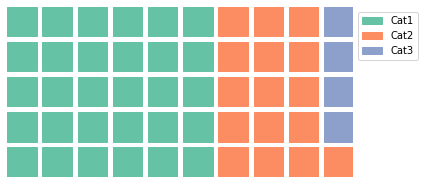

In [33]:
from pywaffle import Waffle
plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values={'Cat1': 30, 'Cat2': 16, 'Cat3': 4},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
fig.show()